# Caida de P$P (Guatemala)

## Conexión con AWS300

In [1]:
import pandas as pd
import numpy as np
import pyodbc
import warnings
warnings.filterwarnings('ignore')
conn = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=AWNTS300;DATABASE=DATALAB;UID=usrdm;PWD=dm$2Admin4')

In [2]:
 #Falta afinar para que sea por país y por campaña
#df = pd.read_sql("select * from [dbo].[CR_INPUT1_PDP]" , conn)
#df = pd.read_sql("select * from [dbo].[CR_INPUT1_PDP]" , conn)

#df = pd.read_sql("select * from [dbo].[CR_INPUT_V2]" , conn)
df = pd.read_sql("select * from [dbo].[CR_INPUT_V2_PE]" , conn)



#df = pd.read_excel('output.xlsx')
writer = pd.ExcelWriter('output.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [3]:
print('La base de datos cuenta con ' + str(df.shape[0]) + ' filas y ' 
      + str(df.shape[1]) +' columnas.')


La base de datos cuenta con 60167 filas y 36 columnas.


## Preparamos el dataset

In [4]:
#Eliminamos las filas que contengan valores NULL en campos donde no deberían tener.
df = df.dropna(axis=0, how='any', subset=['FechaNacimiento'])


In [5]:
def PromVariacion (num1, num2, num3):
    var1 = ((num2/num1)-1)
    var2 = ((num3/num2)-1)
    PromVar = (var1+var2)/2
    return PromVar*100


In [6]:
df['VarVentas3Camp'] = PromVariacion(df.v201711,df.v201712,df.v201713)
df['VarMCT3Camp'] =PromVariacion(df.mct201711,df.mct201712,df.mct201713)
df['VarPPU3Camp'] =PromVariacion(df.ppu201711,df.ppu201712,df.ppu201713)
df['VarPPU3Camp'] =PromVariacion(df.Q201711,df.Q201712,df.Q201713)



In [7]:
df1 = df.drop(['v201711', 'v201712','v201713','v201715','mct201711','mct201712','mct201713','ppu201711','ppu201712','ppu201713',
               'Q201711', 'Q201712', 'Q201713'], axis=1)


In [8]:
pd.DataFrame(df1.dtypes, columns = ['Tipo de dato'])

,Tipo de dato
Pkebelista,int64
Target,int64
Pedidos_ult_18camp,int64
DecilAñoAnterior,float64
PDPAñoAnterior,float64
DecilCampAnterior,int64
PDPCampAnterior,float64
Decil3Camps,int64
PDP3camps,float64
IpUnico,float64


In [9]:
df1['Target'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)


0    43155
1    16997
Name: Target, dtype: int64

In [10]:
import datetime as DT
import numpy as np
import io

now = pd.Timestamp(DT.datetime.now())
df1['FechaNacimiento'] = df1['FechaNacimiento'].where(df1['FechaNacimiento'] < now, df1['FechaNacimiento'] -  np.timedelta64(100, 'Y'))   # 2
df1['Edad'] = (now - df1['FechaNacimiento']).astype('<m8[Y]')    # 3

df1 = df1.drop(['FechaNacimiento'], axis=1)

In [11]:
df1 =  df1.dropna(axis=0, how='any', subset=['AnioCampanaPrimerPedido',
'AnioCampanaPrimerPedWeb',  'AnioCampanaPrimerPedWeb'        ])

df1['AnioCampanaPrimerPedido'] = df1['AnioCampanaPrimerPedido'].astype(str).astype(int)
df1['AnioCampanaPrimerPedWeb'] = df1['AnioCampanaPrimerPedWeb'].astype(str).astype(int)
df1['AnioCampanaIngreso'] = df1['AnioCampanaIngreso'].astype(str).astype(int)

df1.shape

(60137, 26)

In [12]:
df1.describe()

,Pkebelista,Target,Pedidos_ult_18camp,DecilAñoAnterior,PDPAñoAnterior,DecilCampAnterior,PDPCampAnterior,Decil3Camps,PDP3camps,IpUnico,...,AnioCampanaPrimerPedido,AnioCampanaPrimerPedWeb,AnioCampanaIngreso,CYZONE_SH,ESIKA_SH,LBEL_SH,VarVentas3Camp,VarMCT3Camp,VarPPU3Camp,Edad
count,6.013700e+04,60137.000000,60137.000000,49645.000000,49645.000000,60137.000000,60137.000000,60137.000000,60137.000000,60137.000000,...,60137.000000,60137.000000,60137.000000,60137.000000,60137.000000,60137.000000,60137.000000,60137.000000,60137.000000,60137.000000
mean,1.496044e+06,0.282555,14.912433,5.499446,104.632768,5.500258,100.274395,5.500158,105.552487,0.476972,...,201234.424448,201456.853435,201234.425844,0.333983,0.616323,0.049694,2.399127,6.127188,5.410659,41.221444
std,6.313390e+05,0.450245,3.701813,2.872212,256.195975,2.872074,282.312235,2.872305,233.138125,0.430457,...,598.514766,215.987205,598.513265,0.107255,0.109682,0.059589,33.616120,31.277979,38.558063,14.086500
min,7.000000e+00,0.000000,3.000000,1.000000,6.768199,1.000000,2.021212,1.000000,18.208686,0.000000,...,198701.000000,200515.000000,198701.000000,0.010582,0.120000,0.000000,-72.990785,-74.375000,-81.651955,18.000000
25%,1.054879e+06,0.000000,12.000000,3.000000,69.361567,3.000000,56.464330,3.000000,67.940473,0.000000,...,201102.000000,201315.000000,201102.000000,0.260870,0.544304,0.000000,-14.518294,-11.923077,-15.000000,29.000000
50%,1.756876e+06,0.000000,17.000000,5.000000,81.366476,6.000000,73.377709,6.000000,82.858908,0.333333,...,201505.000000,201501.000000,201505.000000,0.333333,0.618182,0.030769,-1.942853,1.250000,0.000000,40.000000
75%,2.038469e+06,1.000000,18.000000,8.000000,100.839029,8.000000,103.476796,8.000000,111.030891,1.000000,...,201614.000000,201617.000000,201614.000000,0.403846,0.690476,0.073394,13.304589,18.181818,17.973856,51.000000
max,2.133375e+06,1.000000,18.000000,10.000000,30447.231132,10.000000,39094.408725,10.000000,32269.758239,1.000000,...,201707.000000,201806.000000,201707.000000,0.813559,0.987654,0.702703,3689.635250,763.235294,1837.500000,98.000000


# Exploración y visualización

### 1 variable

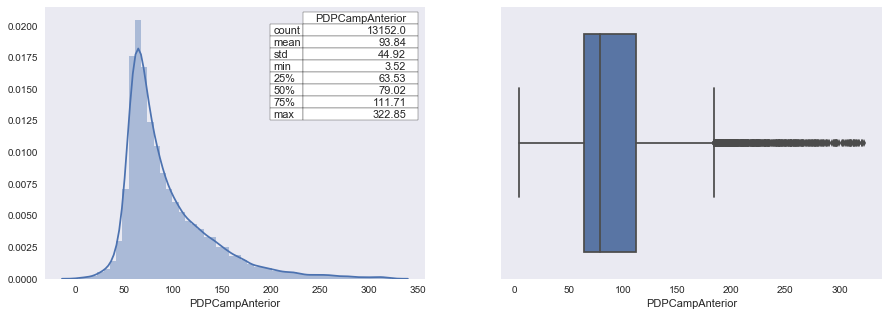

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table 
%matplotlib inline

def VarDescr(variable):
    sns.set()
    sns.set_style("dark")
    fig, ax = plt.subplots(figsize=(15,5), ncols=2)

    table(ax[0], np.round(variable.describe(), 2),loc='upper right', colWidths=[0.3, 0.3])
    sns.distplot(variable, ax = ax[0])
    sns.boxplot(x=variable, ax = ax[1])    
    
    return None 

#VarDescr(df2['PMNPCampAnterior'])

df2so = df1[np.abs(df1.PDPCampAnterior-df1.PDPCampAnterior.mean())<=(3*df1.PDPCampAnterior.std())]

VarDescr(df2so['PDPCampAnterior'])



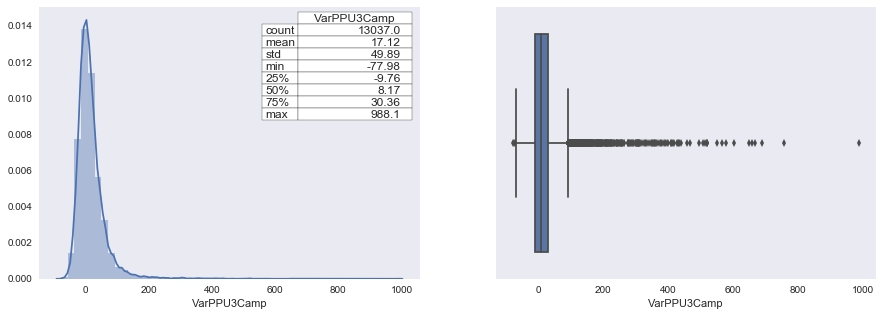

In [164]:
VarDescr(df1[np.abs(df1.PDPPalancas-df1.PDPPalancas.mean())<=(3*df1.PDPPalancas.std())].VarPPU3Camp)


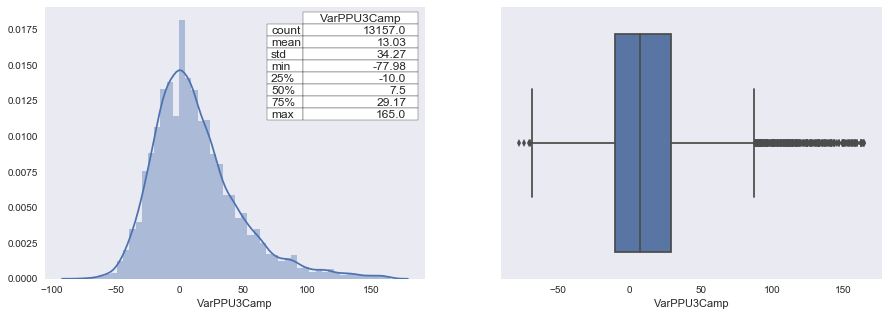

In [165]:
VarDescr(df1[np.abs(df1.VarPPU3Camp-df1.VarPPU3Camp.mean())<=(3*df1.VarPPU3Camp.std())].VarPPU3Camp)

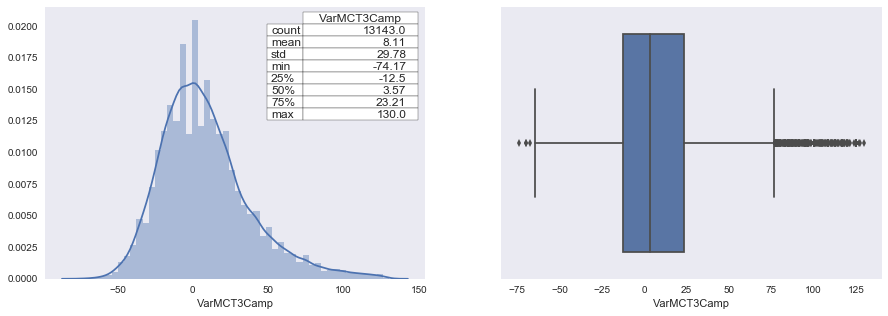

In [166]:
VarDescr(df1[np.abs(df1.VarMCT3Camp-df1.VarMCT3Camp.mean())<=(3*df1.VarMCT3Camp.std())].VarMCT3Camp)

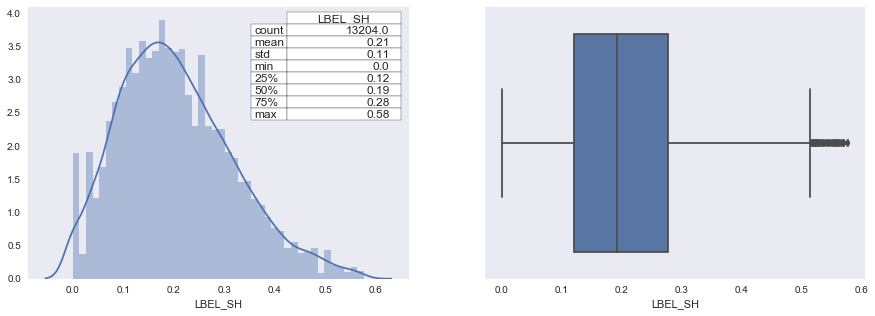

In [169]:
VarDescr(df1[np.abs(df1.LBEL_SH-df1.LBEL_SH.mean())<=(3*df1.LBEL_SH.std())].LBEL_SH)

### Correlación de variables

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
def corr_1(df):
    sns.set(style="white") 
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(10, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    return sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

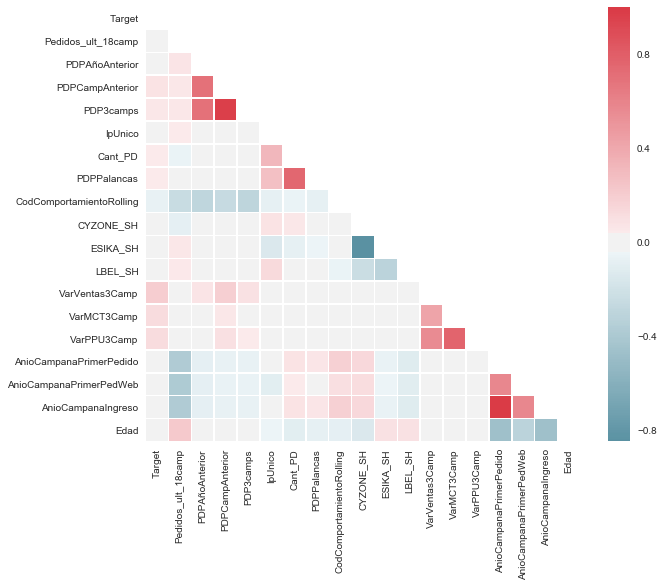

In [14]:
%matplotlib inline

corr_1(df1[[ 'Target', 'Pedidos_ult_18camp', 
       'PDPAñoAnterior', 'PDPCampAnterior',
     'PDP3camps', 'IpUnico', 'Cant_PD', 'PDPPalancas',
       'CodComportamientoRolling', 'CYZONE_SH', 'ESIKA_SH', 'LBEL_SH',
       'VarVentas3Camp', 'VarMCT3Camp', 'VarPPU3Camp',  'AnioCampanaPrimerPedido',
       'AnioCampanaPrimerPedWeb', 'AnioCampanaIngreso', 'Edad']]
      )

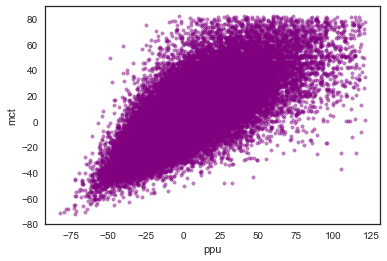

In [17]:
import matplotlib.pyplot as plt
import matplotlib

#columnas sin outlier
fppu = df1[np.abs(df1.VarPPU3Camp-df1.VarPPU3Camp.mean())<=(3*df1.VarPPU3Camp.std())]
fmct = fppu[np.abs(fppu.VarMCT3Camp-fppu.VarMCT3Camp.mean())<=(3*fppu.VarMCT3Camp.std())]

plt.scatter(fmct.VarPPU3Camp, fmct.VarMCT3Camp, c="purple", alpha=0.5, marker='.')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

plt.xlabel("ppu")
plt.ylabel("mct")
plt.show()

KeyboardInterrupt: 

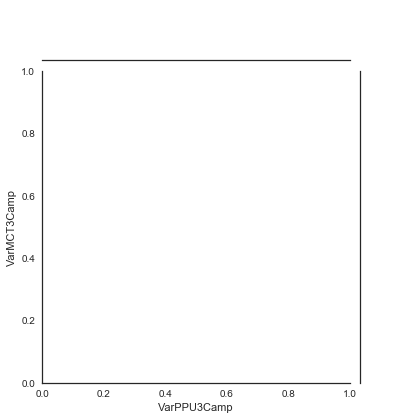

In [18]:
sns.jointplot(x=fmct.VarPPU3Camp, y=fppu.VarMCT3Camp, data=fmct, kind="kde", color="purple")

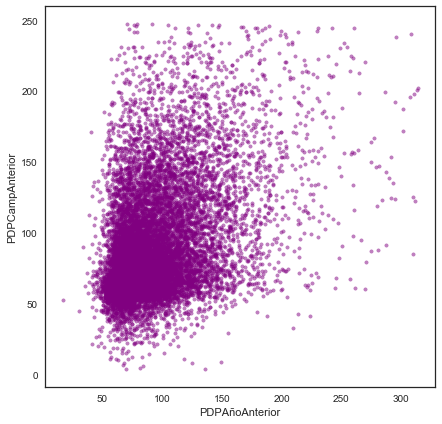

In [42]:
import matplotlib.pyplot as plt
import matplotlib
df22 =  df2.dropna(axis=0, how='all', subset=['DecilAñoAnterior', 'PDPAñoAnterior'])
faño = df22[np.abs(df22.PDPAñoAnterior-df22.PDPAñoAnterior.mean())<=(3*df22.PDPAñoAnterior.std())]
fcamp = faño[np.abs(faño.PDPCampAnterior-faño.PDPCampAnterior.mean())<=(3*faño.PDPCampAnterior.std())]


plt.scatter(fcamp.PDPAñoAnterior, fcamp.PDPCampAnterior, c="purple", alpha=0.5, marker='.')
plt.xlabel("PDPAñoAnterior")
plt.ylabel("PDPCampAnterior")
#plt.legend(loc=2)
plt.show()

## Modelo

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

from xgboost import XGBClassifier




C:\Users\cfabbri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [203]:
#df1.AnioCampanaPrimerPedido.min()

#pasar los AniosCampañas a ordinal numerico para que la nomenclatura no distorsione
# por que hay Primer Año Campaña Pedidos del futuro?
sorted(set(df1.AnioCampanaPrimerPedido))

[200204,
 200205,
 200206,
 200207,
 200208,
 200209,
 200210,
 200212,
 200213,
 200214,
 200215,
 200216,
 200217,
 200301,
 200302,
 200303,
 200304,
 200305,
 200306,
 200307,
 200308,
 200309,
 200310,
 200311,
 200312,
 200313,
 200314,
 200315,
 200316,
 200317,
 200318,
 200401,
 200402,
 200403,
 200404,
 200405,
 200406,
 200407,
 200408,
 200409,
 200410,
 200411,
 200412,
 200413,
 200414,
 200415,
 200416,
 200417,
 200418,
 200501,
 200502,
 200503,
 200504,
 200505,
 200506,
 200507,
 200508,
 200509,
 200510,
 200511,
 200512,
 200513,
 200514,
 200515,
 200516,
 200517,
 200518,
 200601,
 200602,
 200603,
 200604,
 200605,
 200606,
 200607,
 200608,
 200609,
 200610,
 200611,
 200612,
 200613,
 200614,
 200615,
 200616,
 200617,
 200618,
 200701,
 200702,
 200703,
 200704,
 200705,
 200706,
 200707,
 200708,
 200709,
 200710,
 200711,
 200712,
 200713,
 200714,
 200715,
 200716,
 200717,
 200718,
 200801,
 200802,
 200803,
 200804,
 200805,
 200806,
 200807,
 200808,
 

- Se obtiene el cross val score más alto cuando no se remueven outliers del data set

In [23]:
from sklearn.preprocessing import Imputer
df21 = df1.fillna(0)
df21 = df21.drop(['Pkebelista'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
df21.loc[:, df21.columns != 'Target'],
 df21[u'Target'].values, 
 test_size=0.20, 
 random_state=12)

xg = XGBClassifier()
xg.fit(X_train, y_train)

print(xg)


y_pred = xg.predict(X_test)
predictions = [round(value) for value in y_pred]

print(classification_report(y_test, y_pred))


scores = cross_val_score(xg, df21.loc[:, df21.columns != 'Target'],df21[u'Target'].values, scoring = 'neg_log_loss' ,cv=6)
#scoring = 'f1'
#scoring log
print('Cross-validated scores: ', scores, 'prom', np.mean(scores))

#feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns, 
#columns=['importance']).sort_values('importance', ascending=False)

#print(feature_importances)





XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
             precision    recall  f1-score   support

          0       0.80      0.89      0.84      8658
          1       0.61      0.42      0.50      3370

avg / total       0.75      0.76      0.75     12028

Cross-validated scores:  [-0.48450626 -0.47811884 -0.48620948 -0.48197407 -0.47999286 -0.48179852] prom -0.482100006133


In [25]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred) 

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [26]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred) 
labels = ['Sí Cae', '        Sube o Mantiene']
print('Valores predichos arriba y valores reales a la izquierda \n')
print_cm(cnf_matrix, labels)


Valores predichos arriba y valores reales a la izquierda 

                                             Sí Cae         Sube o Mantiene 
                     Sí Cae                  7735.0                   923.0 
            Sube o Mantiene                  1941.0                  1429.0 


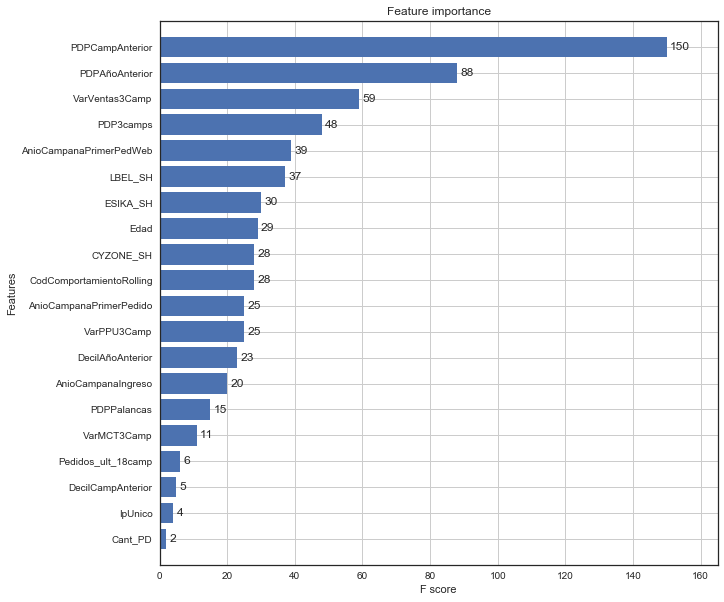

In [186]:
import xgboost as xgb
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xg, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [ ]:

!git add . 

In [ ]:
!git commit -m "added outlier hadling"

In [ ]:
!git push origin develop

# Next steps

- en vez de fillear NAs con 0, rellenar los nulls con valores que se puedan adivinar de las consutloras. Ver en que perfile estan y reemplazarles con el PDP de su segmento y edad??

- Probar con otros países y campañas

- Probar otros algoritmos (XGBoost, LightGBM)

- Validar variables con visión de negocio, incorporar nuevas
    - entender el proceso de ventas (nuevas, establecidas)
    - función de la socia, GZ, 
    - ver incentivos 
    - 
    - 



- BONUS: Integrar con arquitectura AWS